In [44]:
from xopt import Xopt
import os
from concurrent.futures import ProcessPoolExecutor
import numpy as np
import json
from impact import Impact
from distgen import Generator
from matplotlib import pyplot as plt
from genesis.version4 import Genesis4
from genesis import tools
import Genesis_function
from xopt.vocs import VOCS
from xopt.evaluator import Evaluator
from xopt.generators import RandomGenerator
from xopt import Xopt

In [45]:
run_file_location=os.path.expandvars('$LCLS_LATTICE/genesis/version4/cu_hxr/')
run_file=os.path.expandvars('cu_hxr.in')
workdir=os.path.expandvars('$SCRATCH')

nproc=40

In [46]:
X=Xopt('GenesisTwiss.yaml')
X


            Xopt
________________________________
Version: 1.4.1
Data size: 0
Config as YAML:
xopt: {asynch: false, strict: false, dump_file: null, max_evaluations: null}
generator: {name: random}
evaluator:
  function: Genesis_function.evaluate_genesis
  max_workers: 1
  function_kwargs: {nproc: 30, run_file_location: /sdf/home/j/jmorgan/lclsrepo_dontsharethese/lcls-lattice/genesis/version4/cu_hxr/,
    run_file: cu_hxr.in, workdir: /sdf/scratch/users/j/jmorgan, archive_path: /sdf/home/j/jmorgan/beamphysics/jmorgan/ML/Model_twissandtaper/Example/Results}
  vectorized: false
vocs:
  variables:
    alphax: [-1.2, 0.0]
    alphay: [0.0, 1.2]
    betax: [5.0, 10.0]
    betay: [15.0, 20.0]
    taper: [0.0, 0.03]
  constraints: {}
  objectives: {}
  constants: {}
  linked_variables: {}


In [47]:
%%time


filename='./Results/testscan_genesis.json'

def evaluate_random(Plist):


    # trying an example to generate random numbers 
    print(f'Process ID: {os.getpid()} - Evaluating')
    d={}
    #d['alphax']=Plist
    rng = np.random.default_rng(seed=os.getpid())
    d['alphax']=rng.uniform(-0.8, 0)
    d['alphay']=rng.uniform(0, 1.5)
    d['betax']=rng.uniform(5, 10)
    d['betay']=rng.uniform(15, 20)
    
    inputs=d
    print(d['alphax'])
    print(f'Process ID: {os.getpid()} - Evaluating {inputs}')

   # res=X.evaluate(inputs)
    return res, inputs


def evaluate_given(inputs):
    
#    print(f'Process ID: {os.getpid()} - Evaluating {inputs}')

    res=X.evaluate(inputs)
    return res, inputs


def runxoptwithpool(X, Plist):
    results = []
    inputs = []
    
    with ProcessPoolExecutor() as executor:
        for result, input_data in executor.map(evaluate_given, Plist):
            results.append(result)
            inputs.append(input_data)
    d = {}
    d['inputs'] = inputs
    d['outputs'] = results
    return d


DataLen = 5

inputlist = {}
# Generate lists of random numbers with N=100 points
inputlist['alphax'] = np.random.uniform(-0.8, 0, DataLen).tolist()
inputlist['alphay'] = np.random.uniform(0, 1.5, DataLen).tolist()
inputlist['betax'] = np.random.uniform(5, 10, DataLen).tolist()
inputlist['betay'] = np.random.uniform(15, 20, DataLen).tolist()
inputlist['taper'] = np.random.uniform(0, 0.03, DataLen).tolist()


Plist = [{'alphax': ax, 'alphay': ay, 'betax': bx, 'betay': by, 'taper': taper} 
         for ax, ay, bx, by, taper in zip(inputlist['alphax'], inputlist['alphay'], inputlist['betax'], inputlist['betay'], inputlist['taper'])]


#print(f'Generated Input List: {inputlist}')
#print(f'Generated Plist: {Plist}')


result = runxoptwithpool(X, Plist)

#filename='./Results/testscan_genesis3.json'

print('result', result)

res=json.dump(result, open(filename, 'w'))



input dictonaryinput dictonaryinput dictonaryinput dictonaryinput dictonary    {'alphax': -0.27393255435372965, 'alphay': 0.5119985024229892, 'betax': 8.770088362303103, 'betay': 18.73876822549319, 'taper': 0.02059891014076073} {'alphax': -0.7333395810275133, 'alphay': 1.4268024610864614, 'betax': 5.238973712747503, 'betay': 19.812351426982627, 'taper': 0.004448600522837663}{'alphax': -0.15889691366131475, 'alphay': 0.3340593615588095, 'betax': 8.577585479727484, 'betay': 18.89317002401937, 'taper': 0.008827449656398206}{'alphax': -0.00944499819003064, 'alphay': 0.4592481883559671, 'betax': 5.78118117110481, 'betay': 18.607251410838362, 'taper': 0.011874274982606103}
{'alphax': -0.21166481005486582, 'alphay': 0.6665227257342692, 'betax': 6.923724948881292, 'betay': 15.000785444800771, 'taper': 0.00621630418812967}



Configured to run in:Configured to run in: Configured to run in:Configured to run in: /sdf/scratch/users/j/jmorgan/tmpoh_nd8lb Configured to run in: /sdf/scratch/users/j/j

salloc: Granted job allocation 53038025
salloc: Waiting for resource configuration
salloc: Granted job allocation 53038026
salloc: Granted job allocation 53038027
salloc: Granted job allocation 53038028
salloc: Waiting for resource configuration
salloc: Granted job allocation 53038029
salloc: Waiting for resource configuration
salloc: Waiting for resource configuration
salloc: Waiting for resource configuration
salloc: Nodes sdfmilan104 are ready for job
salloc: Nodes sdfmilan105 are ready for job
salloc: Nodes sdfmilan105 are ready for job
salloc: Nodes sdfmilan041 are ready for job
salloc: Nodes sdfmilan009 are ready for job


---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by conda at 2024-01-11 18:02:26 [UTC] from Git Commit ID: 226c27d5b1b045a8195218d2ce5d63aaa10537c7
Starting Time: Mon Aug  5 16:45:10 2024

MPI-Comm Size: 30 nodes

Opened input file /sdf/scratch/users/j/jmorgan/tmpzri7impg/cu_hxr.in
Parsing lattice file lattice.lat ...
---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by conda at 2024-01-11 18:02:26 [UTC] from Git Commit ID: 226c27d5b1b045a8195218d2ce5d63aaa10537c7
Starting Time: Mon Aug  5 16:45:10 2024

MPI-Comm Size: 30 nodes

Opened input file /sdf/scratch/users/j/jmorgan/tmpoz0hngnl/cu_hxr.in
Parsing lattice file lattice.lat ...
Setting up time window of 15.7197 microns with 570 sample points...
Generating input radiation field for HARM = 1 ...
Setting up time window of 15.7197 microns with 570 sample points...
Generating input radiation field for HARM = 1 ...
------

salloc: Relinquishing job allocation 53038025
salloc: Job allocation 53038025 has been revoked.


Calculation terminated due to requested stop.
Writing output file...
Calculation terminated due to requested stop.
Writing output file...
Archiving to file /sdf/home/j/jmorgan/beamphysics/jmorgan/ML/Model_twissandtaper/Example/Results/f4f0665c469495510fe754969c476ecd.h5

Core Simulation done.
End of Track

Core Simulation done.
End of Track

Program is terminating...
Ending Time: Mon Aug  5 16:46:11 2024
Total Wall Clock Time: 59.5899 seconds
-------------------------------------
Finished.
Loading main output: /sdf/scratch/users/j/jmorgan/tmpty_itgx9/LCLS2_HXR_9keV.out.h5


salloc: Relinquishing job allocation 53038026
salloc: Job allocation 53038026 has been revoked.


  Calculation: 90% done

Program is terminating...
Ending Time: Mon Aug  5 16:46:12 2024
Total Wall Clock Time: 60.7453 seconds
-------------------------------------
Finished.
Loading main output: /sdf/scratch/users/j/jmorgan/tmp5sdzze8s/LCLS2_HXR_9keV.out.h5


salloc: Relinquishing job allocation 53038027
salloc: Job allocation 53038027 has been revoked.


  Calculation: 90% done
Archiving to file /sdf/home/j/jmorgan/beamphysics/jmorgan/ML/Model_twissandtaper/Example/Results/8dd64f970512e97a5af69caf8b7080d4.h5
Archiving to file /sdf/home/j/jmorgan/beamphysics/jmorgan/ML/Model_twissandtaper/Example/Results/b3eeccd13536ce5c6e1bfdc6651c3549.h5
Calculation terminated due to requested stop.
Writing output file...
Calculation terminated due to requested stop.
Writing output file...

Core Simulation done.
End of Track

Program is terminating...
Ending Time: Mon Aug  5 16:46:18 2024
Total Wall Clock Time: 67.6869 seconds
-------------------------------------
Finished.
Loading main output: /sdf/scratch/users/j/jmorgan/tmpzri7impg/LCLS2_HXR_9keV.out.h5


salloc: Relinquishing job allocation 53038028
salloc: Job allocation 53038028 has been revoked.



Core Simulation done.
End of Track

Program is terminating...
Ending Time: Mon Aug  5 16:46:19 2024
Total Wall Clock Time: 68.4147 seconds
-------------------------------------
Finished.
Loading main output: /sdf/scratch/users/j/jmorgan/tmpoz0hngnl/LCLS2_HXR_9keV.out.h5


salloc: Relinquishing job allocation 53038029
salloc: Job allocation 53038029 has been revoked.


Archiving to file /sdf/home/j/jmorgan/beamphysics/jmorgan/ML/Model_twissandtaper/Example/Results/d7049e5aba5728e6387237aaa69bd9f8.h5
result {'inputs': [{'alphax': -0.27393255435372965, 'alphay': 0.5119985024229892, 'betax': 8.770088362303103, 'betay': 18.73876822549319, 'taper': 0.02059891014076073}, {'alphax': -0.7333395810275133, 'alphay': 1.4268024610864614, 'betax': 5.238973712747503, 'betay': 19.812351426982627, 'taper': 0.004448600522837663}, {'alphax': -0.15889691366131475, 'alphay': 0.3340593615588095, 'betax': 8.577585479727484, 'betay': 18.89317002401937, 'taper': 0.008827449656398206}, {'alphax': -0.21166481005486582, 'alphay': 0.6665227257342692, 'betax': 6.923724948881292, 'betay': 15.000785444800771, 'taper': 0.00621630418812967}, {'alphax': -0.00944499819003064, 'alphay': 0.4592481883559671, 'betax': 5.78118117110481, 'betay': 18.607251410838362, 'taper': 0.011874274982606103}], 'outputs': [{'energy': 7.489073377332777e-05, 'fingerprint': 'b3eeccd13536ce5c6e1bfdc6651c354

In [48]:
filename='./Results/testscan_genesis.json'


# Reading the saved data
with open(filename, 'r') as f:
    data = json.load(f)

inputs = data.get('inputs', [])
outputs = data.get('outputs', [])



In [49]:
inputs = data.get('inputs', [])
outputs = data.get('outputs', [])

# Combine inputs and outputs into pairs
paired_data = list(zip(inputs, outputs))

# Filter pairs where xopt_error is False
filtered_paired_data = [(input_item, output_item) for input_item, output_item in paired_data if not output_item.get('xopt_error', False)]

# Separate filtered pairs back into inputs and outputs
filtered_inputs, filtered_outputs = zip(*filtered_paired_data) if filtered_paired_data else ([], [])

print("Filtered Inputs:", len(filtered_inputs))
print("Filtered Outputs:", len(filtered_outputs))


# Extract the required values from the filtered inputs and outputs
alphax_values = [input_dict['alphax'] for input_dict in filtered_inputs]
alphay_values = [input_dict['alphay'] for input_dict in filtered_inputs]
betax_values = [input_dict['betax'] for input_dict in filtered_inputs]
betay_values = [input_dict['betay'] for input_dict in filtered_inputs]
taper_values = [input_dict['taper'] for input_dict in filtered_inputs] 
energy_values = [output_dict['energy'] for output_dict in filtered_outputs]

Filtered Inputs: 4
Filtered Outputs: 4


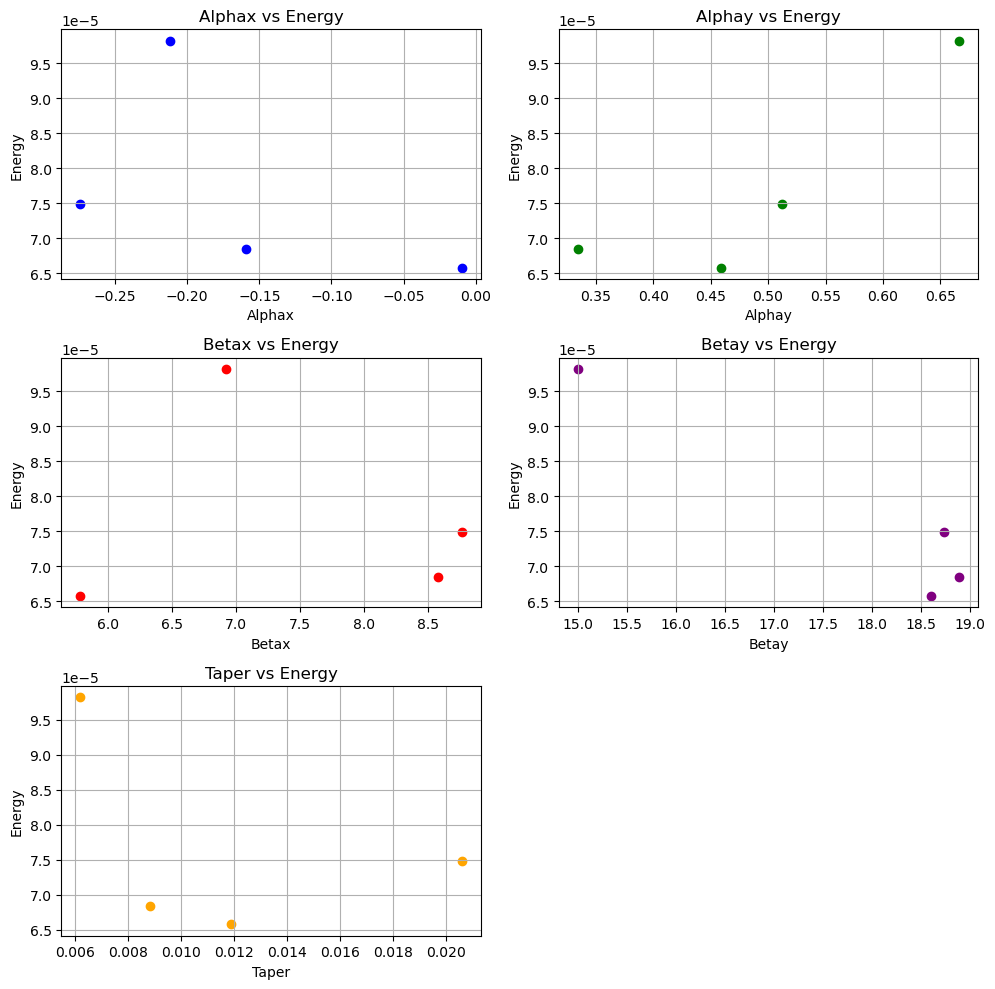

In [50]:
# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Plot alphax vs energy
axs[0, 0].scatter(alphax_values, energy_values, color='blue')
axs[0, 0].set_xlabel('Alphax')
axs[0, 0].set_ylabel('Energy')
axs[0, 0].set_title('Alphax vs Energy')
axs[0, 0].grid(True)

# Plot alphay vs energy
axs[0, 1].scatter(alphay_values, energy_values, color='green')
axs[0, 1].set_xlabel('Alphay')
axs[0, 1].set_ylabel('Energy')
axs[0, 1].set_title('Alphay vs Energy')
axs[0, 1].grid(True)

# Plot betax vs energy
axs[1, 0].scatter(betax_values, energy_values, color='red')
axs[1, 0].set_xlabel('Betax')
axs[1, 0].set_ylabel('Energy')
axs[1, 0].set_title('Betax vs Energy')
axs[1, 0].grid(True)

# Plot betay vs energy
axs[1, 1].scatter(betay_values, energy_values, color='purple')
axs[1, 1].set_xlabel('Betay')
axs[1, 1].set_ylabel('Energy')
axs[1, 1].set_title('Betay vs Energy')
axs[1, 1].grid(True)

# Plot taper vs energy
axs[2, 0].scatter(taper_values, energy_values, color='orange')
axs[2, 0].set_xlabel('Taper')
axs[2, 0].set_ylabel('Energy')
axs[2, 0].set_title('Taper vs Energy')
axs[2, 0].grid(True)

# Hide the empty subplot (2, 1)
axs[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()